## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有五層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)

W0713 16:17:17.019671 15852 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 16:17:17.032636 15852 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 16:17:17.034631 15852 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

In [6]:
"""
Compile 模型
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 16:17:20.434690 15852 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 16:17:20.441645 15852 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
"""
訓練模型並檢視驗證集的結果
設定要訓練的 Epoch 數
"""
history_adam = model.fit(x_train, y_train, 
                         epochs=500, 
                         batch_size=256, 
                         validation_data=(x_test, y_test), 
                         shuffle=True)

W0713 16:17:23.475549 15852 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 16:17:23.561348 15852 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 126us/step - loss: 2.0303 - acc: 0.2512 - val_loss: 1.8382 - val_acc: 0.3348
Epoch 2/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.7676 - acc: 0.3635 - val_loss: 1.6872 - val_acc: 0.4015
Epoch 3/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.6741 - acc: 0.3991 - val_loss: 1.6410 - val_acc: 0.4123
Epoch 4/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6048 - acc: 0.4256 - val_loss: 1.5687 - val_acc: 0.4442
Epoch 5/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5486 - acc: 0.4470 - val_loss: 1.5395 - val_acc: 0.4468
Epoch 6/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5143 - acc: 0.4599 - val_loss: 1.4988 - val_acc: 0.4653
Epoch 7/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.4776 - acc: 0.4707 - val_loss: 1.

50000/50000 [==============================] - 6s 117us/step - loss: 0.5675 - acc: 0.7972 - val_loss: 2.0465 - val_acc: 0.5114
Epoch 60/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.5601 - acc: 0.7997 - val_loss: 2.0390 - val_acc: 0.5068
Epoch 61/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5494 - acc: 0.8029 - val_loss: 2.1393 - val_acc: 0.5064
Epoch 62/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5380 - acc: 0.8066 - val_loss: 2.0399 - val_acc: 0.5029
Epoch 63/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5427 - acc: 0.8048 - val_loss: 2.0799 - val_acc: 0.5047
Epoch 64/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.5095 - acc: 0.8169 - val_loss: 2.2161 - val_acc: 0.5041
Epoch 65/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.5109 - acc: 0.8177 - val_loss: 2.1608 - val_acc: 0.5024
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 119us/step - loss: 0.2379 - acc: 0.9159 - val_loss: 3.3570 - val_acc: 0.4933
Epoch 118/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.2426 - acc: 0.9131 - val_loss: 3.3533 - val_acc: 0.4878
Epoch 119/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.2813 - acc: 0.8984 - val_loss: 3.3474 - val_acc: 0.4902
Epoch 120/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.2972 - acc: 0.8941 - val_loss: 3.4129 - val_acc: 0.4803
Epoch 121/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.2508 - acc: 0.9099 - val_loss: 3.4017 - val_acc: 0.4939
Epoch 122/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.2765 - acc: 0.9012 - val_loss: 3.3820 - val_acc: 0.4986
Epoch 123/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.2654 - acc: 0.9053 - val_loss: 3.3378 - val_acc: 0.4922
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 0.1774 - acc: 0.9359 - val_loss: 4.0867 - val_acc: 0.4914
Epoch 176/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.2123 - acc: 0.9247 - val_loss: 3.8966 - val_acc: 0.4930
Epoch 177/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1618 - acc: 0.9416 - val_loss: 3.9395 - val_acc: 0.4883
Epoch 178/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1516 - acc: 0.9465 - val_loss: 4.0505 - val_acc: 0.4907
Epoch 179/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1841 - acc: 0.9367 - val_loss: 4.0021 - val_acc: 0.4886
Epoch 180/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.2157 - acc: 0.9249 - val_loss: 3.9519 - val_acc: 0.4876
Epoch 181/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1807 - acc: 0.9369 - val_loss: 4.0236 - val_acc: 0.4902
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 0.1369 - acc: 0.9526 - val_loss: 4.3447 - val_acc: 0.49130s - loss: 0.135
Epoch 234/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1274 - acc: 0.9553 - val_loss: 4.3822 - val_acc: 0.4860
Epoch 235/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1648 - acc: 0.9436 - val_loss: 4.3331 - val_acc: 0.4932
Epoch 236/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0938 - acc: 0.9678 - val_loss: 4.3917 - val_acc: 0.4919
Epoch 237/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1455 - acc: 0.9492 - val_loss: 4.3909 - val_acc: 0.4863
Epoch 238/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1433 - acc: 0.9507 - val_loss: 4.4329 - val_acc: 0.4945
Epoch 239/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1631 - acc: 0.9438 - val_loss: 4.3017 - val_acc: 0.4877
Epoch 240/5

50000/50000 [==============================] - 6s 117us/step - loss: 0.1037 - acc: 0.9640 - val_loss: 4.5834 - val_acc: 0.4848
Epoch 292/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1019 - acc: 0.9649 - val_loss: 4.5618 - val_acc: 0.4872
Epoch 293/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1795 - acc: 0.9398 - val_loss: 4.4754 - val_acc: 0.4946
Epoch 294/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0683 - acc: 0.9766 - val_loss: 4.5179 - val_acc: 0.4964
Epoch 295/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0462 - acc: 0.9853 - val_loss: 4.6078 - val_acc: 0.4951
Epoch 296/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1189 - acc: 0.9588 - val_loss: 4.7247 - val_acc: 0.4892
Epoch 297/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1542 - acc: 0.9475 - val_loss: 4.5227 - val_acc: 0.4888
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 0.1246 - acc: 0.9578 - val_loss: 4.6130 - val_acc: 0.4873
Epoch 350/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1323 - acc: 0.9550 - val_loss: 4.6350 - val_acc: 0.4859
Epoch 351/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1164 - acc: 0.9604 - val_loss: 4.6348 - val_acc: 0.4952
Epoch 352/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0798 - acc: 0.9727 - val_loss: 4.7454 - val_acc: 0.4946
Epoch 353/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0631 - acc: 0.9789 - val_loss: 4.7660 - val_acc: 0.4939
Epoch 354/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0925 - acc: 0.9693 - val_loss: 4.7076 - val_acc: 0.4893
Epoch 355/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0676 - acc: 0.9769 - val_loss: 4.7770 - val_acc: 0.4924
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 0.0742 - acc: 0.9753 - val_loss: 4.8484 - val_acc: 0.4851
Epoch 408/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1007 - acc: 0.9669 - val_loss: 4.9278 - val_acc: 0.4871
Epoch 409/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1155 - acc: 0.9617 - val_loss: 4.7821 - val_acc: 0.4817
Epoch 410/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0893 - acc: 0.9696 - val_loss: 4.7757 - val_acc: 0.4928
Epoch 411/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0453 - acc: 0.9849 - val_loss: 4.7966 - val_acc: 0.4939
Epoch 412/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0601 - acc: 0.9793 - val_loss: 4.9247 - val_acc: 0.4884
Epoch 413/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1153 - acc: 0.9620 - val_loss: 4.8299 - val_acc: 0.4856
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 0.1521 - acc: 0.9525 - val_loss: 4.8040 - val_acc: 0.4915
Epoch 466/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0730 - acc: 0.9752 - val_loss: 4.8792 - val_acc: 0.4854
Epoch 467/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0379 - acc: 0.9878 - val_loss: 5.0364 - val_acc: 0.4818
Epoch 468/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0978 - acc: 0.9688 - val_loss: 4.8720 - val_acc: 0.4841
Epoch 469/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.1355 - acc: 0.9553 - val_loss: 4.7620 - val_acc: 0.4884
Epoch 470/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0559 - acc: 0.9816 - val_loss: 4.8700 - val_acc: 0.4945
Epoch 471/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0668 - acc: 0.9773 - val_loss: 4.9126 - val_acc: 0.4892
Epoch 472/500
50000/50000 [

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

def Draw(history):
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

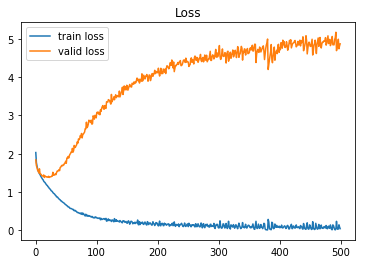

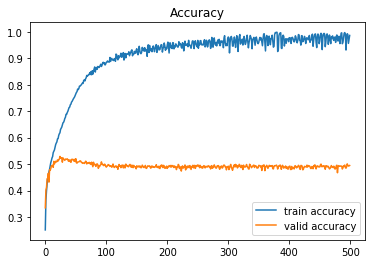

In [9]:
Draw(history_adam)

In [10]:
#將 Optimizer 換成 SGD
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [11]:
"""
Compile 模型
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
"""
訓練模型並檢視驗證集的結果
設定要訓練的 Epoch 數
"""
history_sgd = model.fit(x_train, y_train, 
                        epochs=500, 
                        batch_size=256, 
                        validation_data=(x_test, y_test), 
                        shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0458 - acc: 0.9863 - val_loss: 5.7999 - val_acc: 0.4907
Epoch 2/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.1116 - acc: 0.9717 - val_loss: 6.2190 - val_acc: 0.4823
Epoch 3/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.3100 - acc: 0.9348 - val_loss: 5.9705 - val_acc: 0.4746
Epoch 4/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.1887 - acc: 0.9529 - val_loss: 5.9812 - val_acc: 0.4773
Epoch 5/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.1796 - acc: 0.9559 - val_loss: 5.8072 - val_acc: 0.4927
Epoch 6/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1316 - acc: 0.9661 - val_loss: 5.9851 - val_acc: 0.4760
Epoch 7/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.1357 - acc: 0.9652 - val_loss: 6.3772 - 

50000/50000 [==============================] - 4s 88us/step - loss: 0.0881 - acc: 0.9765 - val_loss: 6.2184 - val_acc: 0.4808
Epoch 60/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0921 - acc: 0.9759 - val_loss: 6.0696 - val_acc: 0.4882
Epoch 61/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0934 - acc: 0.9752 - val_loss: 6.0977 - val_acc: 0.4843
Epoch 62/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0813 - acc: 0.9783 - val_loss: 6.2197 - val_acc: 0.4824
Epoch 63/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0967 - acc: 0.9749 - val_loss: 6.2013 - val_acc: 0.4870
Epoch 64/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1015 - acc: 0.9740 - val_loss: 6.0445 - val_acc: 0.4889
Epoch 65/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0944 - acc: 0.9749 - val_loss: 6.1814 - val_acc: 0.4815
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0543 - acc: 0.9847 - val_loss: 6.4267 - val_acc: 0.4776
Epoch 119/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0622 - acc: 0.9834 - val_loss: 6.3206 - val_acc: 0.4834
Epoch 120/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0763 - acc: 0.9793 - val_loss: 6.3499 - val_acc: 0.4866
Epoch 121/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0946 - acc: 0.9760 - val_loss: 6.1589 - val_acc: 0.4919
Epoch 122/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0484 - acc: 0.9861 - val_loss: 6.3684 - val_acc: 0.4840
Epoch 123/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0513 - acc: 0.9861 - val_loss: 6.3742 - val_acc: 0.4821
Epoch 124/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0456 - acc: 0.9861 - val_loss: 6.3237 - val_acc: 0.48831s - loss: 0.0
Epoch 

50000/50000 [==============================] - 4s 89us/step - loss: 0.0618 - acc: 0.9836 - val_loss: 6.3996 - val_acc: 0.4772
Epoch 177/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0552 - acc: 0.9852 - val_loss: 6.3103 - val_acc: 0.4887
Epoch 178/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0414 - acc: 0.9889 - val_loss: 6.4390 - val_acc: 0.4873
Epoch 179/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0501 - acc: 0.9866 - val_loss: 6.3508 - val_acc: 0.4891
Epoch 180/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0392 - acc: 0.9890 - val_loss: 6.4601 - val_acc: 0.4848
Epoch 181/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0392 - acc: 0.9892 - val_loss: 6.4189 - val_acc: 0.4865
Epoch 182/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0484 - acc: 0.9873 - val_loss: 6.5147 - val_acc: 0.4810
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.0484 - acc: 0.9878 - val_loss: 6.4773 - val_acc: 0.4860
Epoch 235/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0449 - acc: 0.9881 - val_loss: 6.4439 - val_acc: 0.4885
Epoch 236/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0384 - acc: 0.9889 - val_loss: 6.4383 - val_acc: 0.4901
Epoch 237/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0282 - acc: 0.9916 - val_loss: 6.4593 - val_acc: 0.4895
Epoch 238/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0596 - acc: 0.9852 - val_loss: 6.4622 - val_acc: 0.4847
Epoch 239/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0510 - acc: 0.9871 - val_loss: 6.4098 - val_acc: 0.4868
Epoch 240/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.0424 - acc: 0.9882 - val_loss: 6.5129 - val_acc: 0.4913
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 5s 96us/step - loss: 0.0254 - acc: 0.9930 - val_loss: 6.4532 - val_acc: 0.4862
Epoch 293/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0255 - acc: 0.9935 - val_loss: 6.5253 - val_acc: 0.4836
Epoch 294/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.0307 - acc: 0.9916 - val_loss: 6.5611 - val_acc: 0.4859
Epoch 295/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0335 - acc: 0.9908 - val_loss: 6.5627 - val_acc: 0.4868
Epoch 296/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0913 - acc: 0.9791 - val_loss: 6.2665 - val_acc: 0.4870
Epoch 297/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.0395 - acc: 0.9891 - val_loss: 6.3357 - val_acc: 0.4919
Epoch 298/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0392 - acc: 0.9892 - val_loss: 6.4616 - val_acc: 0.4908
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.0465 - acc: 0.9878 - val_loss: 6.5537 - val_acc: 0.4857
Epoch 351/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.0450 - acc: 0.9881 - val_loss: 6.4711 - val_acc: 0.4860
Epoch 352/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0413 - acc: 0.9889 - val_loss: 6.5247 - val_acc: 0.4845
Epoch 353/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0434 - acc: 0.9884 - val_loss: 6.5264 - val_acc: 0.4787
Epoch 354/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0323 - acc: 0.9915 - val_loss: 6.5279 - val_acc: 0.4838
Epoch 355/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0354 - acc: 0.9901 - val_loss: 6.5795 - val_acc: 0.4811
Epoch 356/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0222 - acc: 0.9937 - val_loss: 6.5340 - val_acc: 0.4890
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 5s 95us/step - loss: 0.0255 - acc: 0.9935 - val_loss: 6.5786 - val_acc: 0.4814
Epoch 409/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0299 - acc: 0.9913 - val_loss: 6.5467 - val_acc: 0.4847
Epoch 410/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.0403 - acc: 0.9898 - val_loss: 6.5479 - val_acc: 0.4885
Epoch 411/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.0293 - acc: 0.9924 - val_loss: 6.6145 - val_acc: 0.4883
Epoch 412/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0433 - acc: 0.9893 - val_loss: 6.4922 - val_acc: 0.4867
Epoch 413/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0253 - acc: 0.9933 - val_loss: 6.5738 - val_acc: 0.4842
Epoch 414/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0390 - acc: 0.9901 - val_loss: 6.6028 - val_acc: 0.4826
Epoch 415/500
50000/50000 [======

50000/50000 [==============================] - 4s 89us/step - loss: 0.0221 - acc: 0.9941 - val_loss: 6.5667 - val_acc: 0.4926
Epoch 467/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0233 - acc: 0.9936 - val_loss: 6.5734 - val_acc: 0.4907
Epoch 468/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0320 - acc: 0.9918 - val_loss: 6.6282 - val_acc: 0.4848
Epoch 469/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0328 - acc: 0.9914 - val_loss: 6.5484 - val_acc: 0.4829
Epoch 470/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0361 - acc: 0.9903 - val_loss: 6.5377 - val_acc: 0.4861
Epoch 471/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0241 - acc: 0.9934 - val_loss: 6.5896 - val_acc: 0.4852
Epoch 472/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0338 - acc: 0.9913 - val_loss: 6.5237 - val_acc: 0.4897
Epoch 473/500
50000/50000 [=======

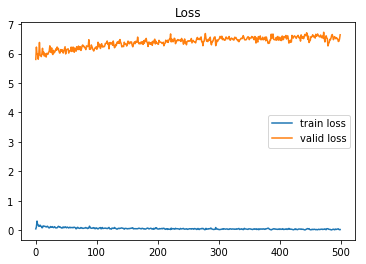

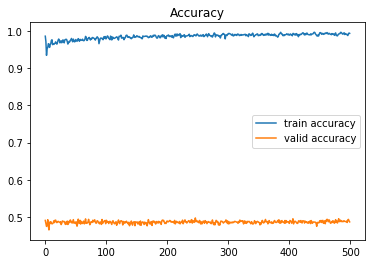

In [13]:
Draw(history_sgd)